<a href="https://colab.research.google.com/github/alibagheribardi/ChatrAzar/blob/main/Eigenbasis_FrDFT_odd_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import matrix_power

# === Parameters for ODD-length FrDFT ===
m = 100
N = 2 * m + 1  # Ensures N is odd
pi = np.pi
w = np.exp(-2j * pi / N)  # Twiddle factor for FrDFT

# === Construct Identity and Reflection (Symmetry) Matrices ===
I = np.eye(N)
J_N = np.fliplr(I)  # Reversal operator: flips each row

# === Construct FrDFT Matrix G ===
G = np.zeros((N, N), dtype=complex)
for k in range(N):
    G[k] = np.sqrt(1 / N) * np.array([
        w ** ((k + 0.5) * (l + 0.5)) for l in range(N)
    ])

# === Matrix Powers ===
G2 = matrix_power(G, 2)  # G squared
G4 = matrix_power(G, 4)  # G to the 4th power

# === Algebraic Identity Verification ===
print("\n--- Algebraic Identity Checks in the Odd case ---")
if np.allclose(G2, -J_N, atol=1e-10):
    print("✅ G² = -J_N confirmed")
else:
    print("❌ G² ≠ -J_N")

if np.allclose(G4, I, atol=1e-10):
    print("✅ G⁴ = I confirmed")
else:
    print("❌ G⁴ ≠ I")
print("----------------------------------\n")


FrDCT = np.zeros_like(G)
FrDST = np.zeros_like(G)


# === Construct FrDCT and FrDST ===
for k in range(N):
    FrDCT[k] = (2 / np.sqrt(N)) * np.array([
        np.cos(((k + 0.5) * (l + 0.5) * 2 * np.pi) / N) for l in range(N)
    ])
    FrDST[k] = (2 / np.sqrt(N)) * np.array([
        np.sin(((k + 0.5) * (l + 0.5) * 2 * np.pi) / N) for l in range(N)
    ])



--- Algebraic Identity Checks in the Odd case ---
✅ G² = -J_N confirmed
✅ G⁴ = I confirmed
----------------------------------



In [ ]:
FrDCT = np.zeros_like(G)
FrDST = np.zeros_like(G)

# === Construct FrDCT and FrDST ===
for k in range(N):
    FrDCT[k] = (2 / np.sqrt(N)) * np.array([
        np.cos(((k + 0.5) * (l + 0.5) * 2 * np.pi) / N) for l in range(N)
    ])
    FrDST[k] = (2 / np.sqrt(N)) * np.array([
        np.sin(((k + 0.5) * (l + 0.5) * 2 * np.pi) / N) for l in range(N)

    ])


# === Inform Matrix Shapes ===
print(f"\nShape of FrDCT: {FrDCT.shape}")
print(f"Shape of FrDST: {FrDST.shape}")


# === Part 1: FrDCT Squared Identity ===
Square_FrDCT = FrDCT @ FrDCT

print("\n--- FrDCT Analysis ---")
if np.allclose(Square_FrDCT, 2 * (I - J_N), atol=1e-10):
    print("✅ FrDCT² = 2·(I - J_N) confirmed")
else:
    print("❌ FrDCT² ≠ 2·(I - J_N)")

# Eigenvalue spectrum of FrDCT
eigvals_FrDCT = np.unique(np.round(np.linalg.eigvals(FrDCT), decimals=5))
print(f"Eigenvalues of FrDCT: {eigvals_FrDCT}")
print("*" * 40)

# === Part 2: FrDST Squared Identity ===
Square_FrDST = FrDST @ FrDST

print("\n--- FrDST Analysis ---")
if np.allclose(Square_FrDST, 2 * (I + J_N), atol=1e-10):
    print("✅ FrDST² = 2·(I + J_N) confirmed")
else:
    print("❌ FrDST² ≠ 2·(I + J_N)")

# Eigenvalue spectrum of FrDST
eigvals_FrDST = np.unique(np.round(np.linalg.eigvals(FrDST), decimals=5))
print(f"Eigenvalues of FrDST: {eigvals_FrDST}")
print("*" * 40)





Shape of FrDCT: (201, 201)
Shape of FrDST: (201, 201)

--- FrDCT Analysis ---
✅ FrDCT² = 2·(I - J_N) confirmed
Eigenvalues of FrDCT: [-2.+0.j  0.+0.j  2.+0.j]
****************************************

--- FrDST Analysis ---
✅ FrDST² = 2·(I + J_N) confirmed
Eigenvalues of FrDST: [-2.+0.j  0.+0.j  2.+0.j]
****************************************


In [ ]:
# === Verify algebraic decomposition of G ===
check1 = np.round(G - J_N @ G - FrDCT, 2)
check2 = np.round(G + J_N @ G + 1j * FrDST, 2)

zero_matrix = np.zeros_like(G)
print("\n--- Decomposition Verification ---")
if np.allclose(check1, zero_matrix) and np.allclose(check2, zero_matrix):
    print("✅ G - JG = FrDCT and G + JG = -i·FrDST confirmed")
else:
    print("❌ Decomposition mismatch detected")
print("----------------------------------")

# === Construct eigenspace components ===
Eig_pos1 = (I - J_N) + FrDCT       # eigval +1
Eig_neg1 = (I - J_N) - FrDCT       # eigval -1
Eig_posi = (I + J_N) - FrDST       # eigval +i
Eig_negi = (I + J_N) + FrDST       # eigval -i

# === Verify eigenvalue equations Gv = λv ===
print("\n--- Eigenvalue Verification ---")
def check_eigvec(eig_matrix, expected, label):
    if np.allclose(G @ eig_matrix, expected * eig_matrix, atol=1e-2):
        print(f"✅ EigVecs confirmed for eigenvalue {label}")
    else:
        print(f"❌ EigVecs failed for eigenvalue {label}")

check_eigvec(Eig_pos1,  1,   "+1")
check_eigvec(Eig_neg1, -1,   "-1")
check_eigvec(Eig_posi,  1j,  "+i")
check_eigvec(Eig_negi, -1j,  "-i")
print("----------------------------------")

# === Construct normalized projection matrices ===
Proj_pos1 = (1/4) * Eig_pos1
Proj_neg1 = (1/4) * Eig_neg1
Proj_posi = (1/4) * Eig_posi
Proj_negi = (1/4) * Eig_negi


# === Inform Matrix Shapes ===
print("\n--- Projection Matrix Shapes ---")
print(f"Shape of Proj_pos1: {Proj_pos1.shape}")
print(f"Shape of Proj_neg1: {Proj_neg1.shape}")
print(f"Shape of Proj_posi: {Proj_posi.shape}")
print(f"Shape of Proj_negi: {Proj_negi.shape}")
print("--------------------------------")

# === Check idempotence: P^2 = P ===
print("\n--- Idempotence Checks for Projectors ---")
def check_idempotent(P, label):
    if np.allclose(P @ P, P, atol=1e-2):
        print(f"✅ Proj_{{{label}}} is idempotent")
    else:
        print(f"❌ Proj_{{{label}}} is not idempotent")

check_idempotent(Proj_pos1, "+1")
check_idempotent(Proj_neg1, "-1")
check_idempotent(Proj_posi, "+i")
check_idempotent(Proj_negi, "-i")
print("------------------------------------------\n")

# === Final identity decomposition check ===
identity_operator = Proj_pos1 + Proj_neg1 + Proj_posi + Proj_negi

print("\n--- Identity Decomposition Check ---")
if np.allclose(np.eye(N), identity_operator, atol=1e-2):
    print("✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed")
else:
    print("❌ Identity cannot be decomposed into spectral projections")
print("------------------------------------------")



--- Decomposition Verification ---
✅ G - JG = FrDCT and G + JG = -i·FrDST confirmed
----------------------------------

--- Eigenvalue Verification ---
✅ EigVecs confirmed for eigenvalue +1
✅ EigVecs confirmed for eigenvalue -1
✅ EigVecs confirmed for eigenvalue +i
✅ EigVecs confirmed for eigenvalue -i
----------------------------------

--- Projection Matrix Shapes ---
Shape of Proj_pos1: (201, 201)
Shape of Proj_neg1: (201, 201)
Shape of Proj_posi: (201, 201)
Shape of Proj_negi: (201, 201)
--------------------------------

--- Idempotence Checks for Projectors ---
✅ Proj_{+1} is idempotent
✅ Proj_{-1} is idempotent
✅ Proj_{+i} is idempotent
✅ Proj_{-i} is idempotent
------------------------------------------


--- Identity Decomposition Check ---
✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed
------------------------------------------



--- FrDCT Block Reconstruction Check ---
✅ FrDCT matches block structure for odd N
-------------------------------------------

--- C_even Orthogonality Check ---
✅ C_even is orthogonal
Eigenvalues of C_even @ C_even.T: [1.+0.j]
----------------------------------


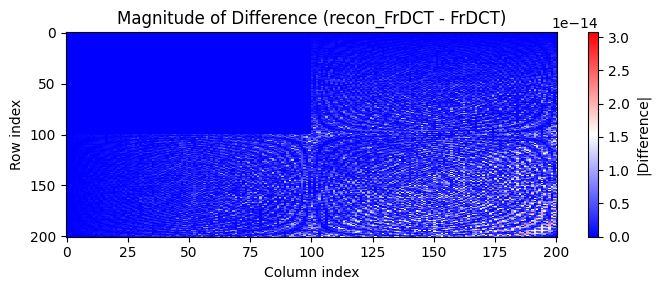

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# === Extract Even Block from FrDCT ===
C_even = FrDCT[:m, :m]
J_m = np.fliplr(np.eye(m))  # Reversal matrix of size m x m

# === Construct Zero Padding Blocks ===
zero_col = np.zeros((m, 1))           # m x 1 column of zeros
zero_row = np.zeros((1, N))           # 1 x N row of zeros

# === Block-wise Reconstruction of FrDCT (odd N = 2m + 1) ===
recon_FrDCT = np.block([
    [      C_even,     zero_col,       -C_even @ J_m     ],
    [      zero_row                         ],
    [ -J_m @ C_even,   zero_col,      J_m @ C_even @ J_m ]
])

# === Verification ===
print("\n--- FrDCT Block Reconstruction Check ---")
if np.allclose(FrDCT, recon_FrDCT, atol=1e-10):
    print("✅ FrDCT matches block structure for odd N")
else:
    print("❌ FrDCT does not match reconstructed block form")
print("-------------------------------------------\n")

# === Difference Matrix ===
diff_C = recon_FrDCT - FrDCT


# === Orthogonality / Eigenvalue Check ===
Square_C = np.round(C_even @ C_even.T, 6)
eig_C = np.unique(np.round(np.linalg.eigvals(Square_C), 6))

print("--- C_even Orthogonality Check ---")
if np.allclose(Square_C, np.eye(m)):
    print("✅ C_even is orthogonal")
else:
    print("❌ C_even is not orthogonal")
print("Eigenvalues of C_even @ C_even.T:", eig_C)
print("----------------------------------")


# === Plot Heatmap of Difference ===
plt.figure(figsize=(7, 3))
plt.title("Magnitude of Difference (recon_FrDCT - FrDCT)")
plt.imshow(np.abs(diff_C), cmap='bwr', interpolation='nearest', aspect='auto', vmin=0, vmax=np.max(np.abs(diff_C)))
plt.colorbar(label='|Difference|')
plt.xlabel('Column index')
plt.ylabel('Row index')
plt.tight_layout()
plt.show()



--- FrDST Block Reconstruction Check ---
FrDST shape:         (201, 201)
Reconstructed shape: (201, 201)
✅ FrDST matches block structure
---------------------------------------------

--- S_even Orthogonality Check ---
✅ S_even is orthogonal
Eigenvalues of S_even @ S_even.T: [1.+0.j]
----------------------------------


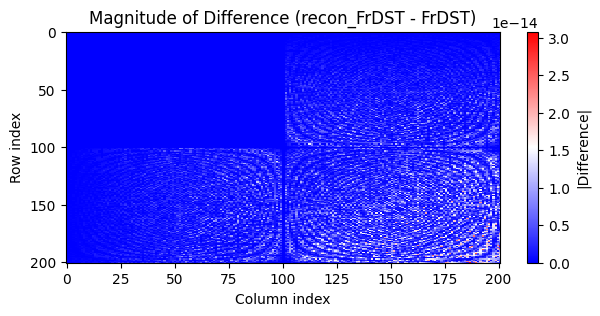

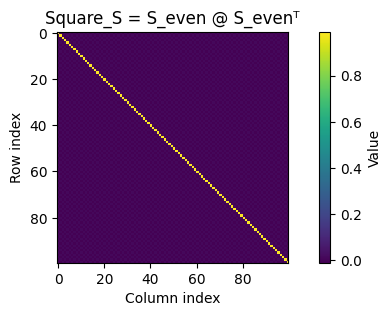

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# === Reflection Matrix ===
J_m = np.fliplr(np.eye(m))  # Reversal matrix of size m x m

# === Construct FrDST Matrix ===
FrDST = np.zeros((N, N))
for k in range(N):
    FrDST[k] = (2 / np.sqrt(N)) * np.array([
        np.sin(((k + 0.5) * (l + 0.5) * 2 * pi) / N) for l in range(N)
    ])

# === Construct Alternating Patterns ===
mid_pattern = (2 / np.sqrt(N)) * np.array([(-1) ** i for i in range(m)])
mid_col = mid_pattern.reshape(m, 1)  # m x 1 column vector

middle_row_full = (2 / np.sqrt(N)) * np.array([(-1) ** i for i in range(N)]).reshape(1, N)  # 1 x N row vector

# === Extract S_even Block ===
S_even = FrDST[:m, :m]

# === Block-wise Reconstruction of FrDST ===
recon_FrDST = np.block([
    [         S_even,       mid_col,       S_even @ J_m       ],
    [  middle_row_full                              ],
    [   J_m @ S_even,   J_m @ mid_col,    J_m @ S_even @ J_m  ]
])

# === Verification ===
print("\n--- FrDST Block Reconstruction Check ---")
print("FrDST shape:        ", FrDST.shape)
print("Reconstructed shape:", recon_FrDST.shape)

if np.allclose(FrDST, recon_FrDST, atol=1e-7):
    print("✅ FrDST matches block structure")
else:
    print("❌ FrDST does NOT match reconstructed block form")
print("---------------------------------------------\n")

# === Difference Matrix and Heatmap ===
diff_S = recon_FrDST - FrDST


# === Orthogonality Check of S_even ===
Square_S = np.round(S_even @ S_even, 2)
eig_S = np.unique(np.round(np.linalg.eigvals(  Square_S), 2))


print("--- S_even Orthogonality Check ---")
if np.allclose(Square_C, np.eye(m)):
    print("✅ S_even is orthogonal")
else:
    print("❌ S_even is not orthogonal")
print("Eigenvalues of S_even @ S_even.T:", eig_C)
print("----------------------------------")



plt.figure(figsize=(7, 3))
plt.title("Magnitude of Difference (recon_FrDST - FrDST)")
plt.imshow(np.abs(diff_S), cmap='bwr', interpolation='nearest', aspect='auto')
plt.colorbar(label='|Difference|')
plt.xlabel('Column index')
plt.ylabel('Row index')
plt.show()


# === Heatmap of Square_S (Orthogonality Check) ===
plt.figure(figsize=(8, 3))
plt.title("Square_S = S_even @ S_evenᵀ")
plt.imshow(Square_S, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.xlabel('Column index')
plt.ylabel('Row index')
plt.show()


In [ ]:
zeros_matrix = np.zeros_like(G)


# === Verify algebraic decomposition of G ===
check1 = np.round(G - J_N @ G - FrDCT, 2)
check2 = np.round(G + J_N @ G + 1j * FrDST, 2)

print("\n--- Decomposition Verification ---")
if np.allclose(check1, zeros_matrix) and np.allclose(check2, zeros_matrix):
    print("✅ G - JG = FrDCT and G + JG = -i·FrDST confirmed")
else:
    print("❌ Decomposition mismatch detected")
print("----------------------------------")

# === Construct eigenspace components ===
Eig_pos1 = (I - J_N) + FrDCT       # eigval +1
Eig_neg1 = (I - J_N) - FrDCT       # eigval -1
Eig_posi = (I + J_N) - FrDST       # eigval +i
Eig_negi = (I + J_N) + FrDST       # eigval -i

# === Verify eigenvalue equations Gv = λv ===
print("\n--- Eigenvalue Verification ---")
def check_eigvec(eig_matrix, expected, label):
    if np.allclose(G @ eig_matrix, expected * eig_matrix, atol=1e-2):
        print(f"✅ EigVecs confirmed for eigenvalue {label}")
    else:
        print(f"❌ EigVecs failed for eigenvalue {label}")

check_eigvec(Eig_pos1,  1,   "+1")
check_eigvec(Eig_neg1, -1,   "-1")
check_eigvec(Eig_posi,  1j,  "+i")
check_eigvec(Eig_negi, -1j,  "-i")
print("----------------------------------")

# === Construct normalized projection matrices ===
Proj_pos1 = (1/4) * Eig_pos1
Proj_neg1 = (1/4) * Eig_neg1
Proj_posi = (1/4) * Eig_posi
Proj_negi = (1/4) * Eig_negi

# === Check idempotence: P^2 = P ===
print("\n--- Idempotence Checks for Projectors ---")
def check_idempotent(P, label):
    if np.allclose(P @ P, P, atol=1e-2):
        print(f"✅ Proj_{{{label}}} is idempotent")
    else:
        print(f"❌ Proj_{{{label}}} is not idempotent")

check_idempotent(Proj_pos1, "+1")
check_idempotent(Proj_neg1, "-1")
check_idempotent(Proj_posi, "+i")
check_idempotent(Proj_negi, "-i")
print("------------------------------------------\n")

# === Final identity decomposition check ===
identity_operator = Proj_pos1 + Proj_neg1 + Proj_posi + Proj_negi

print("\n--- Identity Decomposition Check ---")
if np.allclose(np.eye(N), identity_operator, atol=1e-2):
    print("✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed")
else:
    print("❌ Identity cannot be decomposed into spectral projections")
print("------------------------------------------")



--- Decomposition Verification ---
✅ G - JG = FrDCT and G + JG = -i·FrDST confirmed
----------------------------------

--- Eigenvalue Verification ---
✅ EigVecs confirmed for eigenvalue +1
✅ EigVecs confirmed for eigenvalue -1
✅ EigVecs confirmed for eigenvalue +i
✅ EigVecs confirmed for eigenvalue -i
----------------------------------

--- Idempotence Checks for Projectors ---
✅ Proj_{+1} is idempotent
✅ Proj_{-1} is idempotent
✅ Proj_{+i} is idempotent
✅ Proj_{-i} is idempotent
------------------------------------------


--- Identity Decomposition Check ---
✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed
------------------------------------------


In [ ]:
# === Part 1: FrDCT Squared Identity ===
Square_FrDCT = FrDCT @ FrDCT

print("\n--- FrDCT Analysis ---")
if np.allclose(Square_FrDCT, 2 * (I - J_N), atol=1e-10):
    print("✅ FrDCT² = 2·(I - J_N) confirmed")
else:
    print("❌ FrDCT² ≠ 2·(I - J_N)")

# Eigenvalue spectrum of FrDCT
eigvals_FrDCT = np.unique(np.round(np.linalg.eigvals(FrDCT), decimals=5))
print(f"Eigenvalues of FrDCT: {eigvals_FrDCT}")
print("*" * 40)

# === Part 2: FrDST Squared Identity ===
Square_FrDST = FrDST @ FrDST

print("\n--- FrDST Analysis ---")
if np.allclose(Square_FrDST, 2 * (I + J_N), atol=1e-10):
    print("✅ FrDST² = 2·(I + J_N) confirmed")
else:
    print("❌ FrDST² ≠ 2·(I + J_N)")

# Eigenvalue spectrum of FrDST
eigvals_FrDST = np.unique(np.round(np.linalg.eigvals(FrDST), decimals=5))
print(f"Eigenvalues of FrDST: {eigvals_FrDST}")
print("*" * 40)




--- FrDCT Analysis ---
✅ FrDCT² = 2·(I - J_N) confirmed
Eigenvalues of FrDCT: [-2.+0.j  0.+0.j  2.+0.j]
****************************************

--- FrDST Analysis ---
✅ FrDST² = 2·(I + J_N) confirmed
Eigenvalues of FrDST: [-2.  0.  2.]
****************************************


In [ ]:
import numpy as np

# N must be odd: N = 2*m + 1
# Create a random vector v of length m
v = np.random.rand(m)      # first half (length m)
vt = v[::-1]               # reversed vector

# Construct eigenvector candidate: [v | 0 | reversed(v)]  shape (N,)
eigvec_0 = np.concatenate([v, [0], vt])

# Apply FrDCT and check null space property
residual = FrDCT @ eigvec_0

if np.allclose(residual, np.zeros_like(residual), atol=1e-10):
    print("✅ The vector lies in the null space of FrDCT (eigenvalue 0), for odd-dimensional N.")
    print("→ Structure: [v | 0 | reversed(v)], with v ∈ ℝ^m")
else:
    print("❌ The vector is not in the null space — check form or FrDCT definition.")


✅ The vector lies in the null space of FrDCT (eigenvalue 0), for odd-dimensional N.
→ Structure: [v | 0 | reversed(v)], with v ∈ ℝ^m
